In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "fitbit"

#1. INTRODUCTION:

Bella beat, a high-tech manufacturer of health-focused products for women. Bella beat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, co-founder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

The Bella beat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bella beat app connects to their line of smart wellness products

This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bella beat app to provide you with insights into your daily wellness.

Bella beat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.



#2. REQUIREMENTS:

##Business Task:

To analyze smart device usage data in order to gain insight into how consumers use non-Bella beat smart devices.

##Questions:

What are some trends in smart device usage?
How could these trends apply to Bella beat Customers?
How could these trends help influence Bella beat marketing strategy?

##Deliverables:

*Clear Summary of the business task.
*Description of all data sources used.
*Documentation of any cleaning or manipulation of data.
*Supporting visualizations and key findings.
*A summary of your analysis.
*Top high-level content recommendations based on your analysis

(I ll be using the existing bellbeat fitness tracker data of sleep tracking, daily activity, weight information)

##1.  Install and load the packages


In [2]:
install.packages("tidyverse")
install.packages("janitor")
install.packages("knitr")
install.packages("lubridate")
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(lubridate)
library(tidyr)
library(janitor)
library(knitr)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




##2. Importing the data

In [4]:
daily_activity <- read.csv ("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


##3. summarize the data

In [5]:
#daily_activity_summary
daily_activity %>%
select(ActivityDate, TotalSteps, SedentaryMinutes, Calories)%>%
summary()

#calories_summary
calories%>%
select(ActivityDay, Calories)%>%
summary()

#sleep_summary
sleep %>%
select(SleepDay, TotalMinutesAsleep, TotalTimeInBed)%>%
summary()

#weight_summary
weight %>%
select(Date, WeightKg, BMI)%>%
summary()

 ActivityDate         TotalSteps    SedentaryMinutes    Calories   
 Length:940         Min.   :    0   Min.   :   0.0   Min.   :   0  
 Class :character   1st Qu.: 3790   1st Qu.: 729.8   1st Qu.:1828  
 Mode  :character   Median : 7406   Median :1057.5   Median :2134  
                    Mean   : 7638   Mean   : 991.2   Mean   :2304  
                    3rd Qu.:10727   3rd Qu.:1229.5   3rd Qu.:2793  
                    Max.   :36019   Max.   :1440.0   Max.   :4900  

 ActivityDay           Calories   
 Length:940         Min.   :   0  
 Class :character   1st Qu.:1828  
 Mode  :character   Median :2134  
                    Mean   :2304  
                    3rd Qu.:2793  
                    Max.   :4900  

   SleepDay         TotalMinutesAsleep TotalTimeInBed 
 Length:413         Min.   : 58.0      Min.   : 61.0  
 Class :character   1st Qu.:361.0      1st Qu.:403.0  
 Mode  :character   Median :433.0      Median :463.0  
                    Mean   :419.5      Mean   :458.6  
                    3rd Qu.:490.0      3rd Qu.:526.0  
                    Max.   :796.0      Max.   :961.0  

     Date              WeightKg           BMI       
 Length:67          Min.   : 52.60   Min.   :21.45  
 Class :character   1st Qu.: 61.40   1st Qu.:23.96  
 Mode  :character   Median : 62.50   Median :24.39  
                    Mean   : 72.04   Mean   :25.19  
                    3rd Qu.: 85.05   3rd Qu.:25.56  
                    Max.   :133.50   Max.   :47.54  

##4. Cleaning the dataset

In [6]:
daily_activity <- clean_names(daily_activity)
calories <- clean_names(calories)
sleep <- clean_names(sleep)
weight <- clean_names(weight)

##5. checking the colnames and dataset

In [7]:
str(daily_activity)
head(calories)
str(sleep)
head(weight)

'data.frame':	940 obs. of  15 variables:
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_date             : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ total_steps               : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ total_distance            : num  8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num  8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentary_minutes         : in

,id,activity_day,calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


'data.frame':	413 obs. of  5 variables:
 $ id                  : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ sleep_day           : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ total_sleep_records : int  1 2 1 2 1 1 1 1 1 1 ...
 $ total_minutes_asleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ total_time_in_bed   : int  346 407 442 367 712 320 377 364 384 449 ...


,id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


##6. Cleaning the date and time

In [8]:
daily_activity$activity_date <- mdy(daily_activity$activity_date)
sleep <- separate(sleep, sleep_day, c("date", "time"), " ")
sleep$date <- mdy(sleep$date)
str(daily_activity)
str(sleep)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


'data.frame':	940 obs. of  15 variables:
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_date             : Date, format: "2016-04-12" "2016-04-13" ...
 $ total_steps               : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ total_distance            : num  8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num  8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentary_minutes         : int  728 776 12

##7. checking for duplicates

In [9]:
sum(duplicated(daily_activity))
sum(duplicated(calories))
sum(duplicated(sleep)) #3 duplicates
sum(duplicated(weight))

#removing the duplicates
sleep <- sleep %>% 
distinct()

[1] 0

[1] 0

[1] 3

[1] 0

##8. Plotting the the relationship between steps and calories spent. 
**This visualization show calories burnt increases as the steps increases**

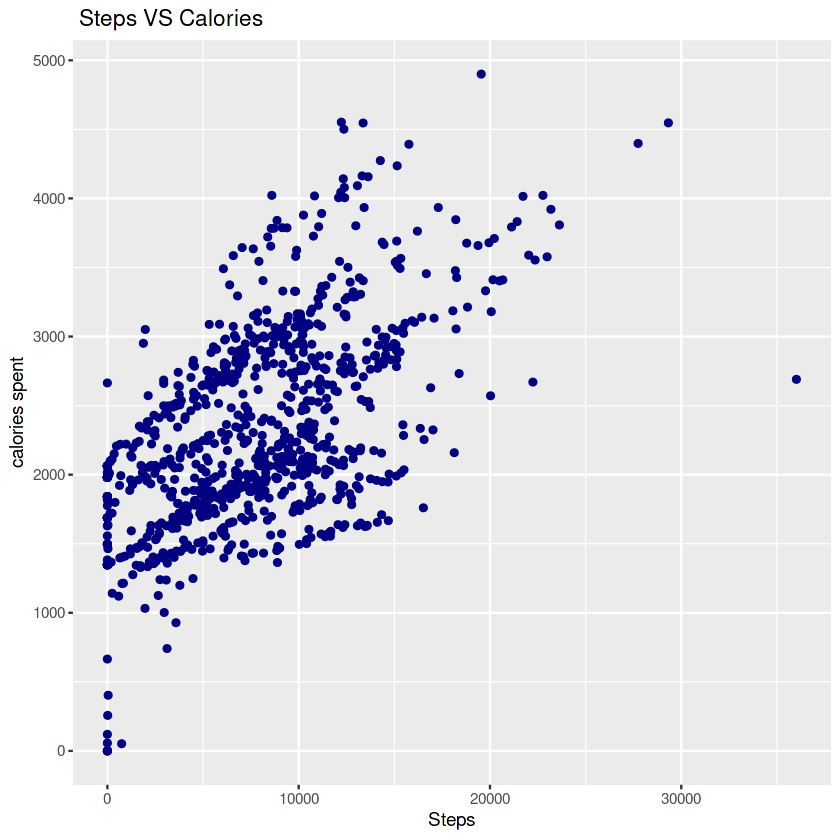

In [10]:
ggplot(daily_activity) + 
  geom_point(mapping = aes(x = total_steps, y = calories), color = "navy blue") + 
  labs(x = "Steps", y = "calories spent", title = " Steps VS Calories")

##9. Plotting the sleeping trends with the total steps shows there isnt any major relationship between the steps and sleeping trends

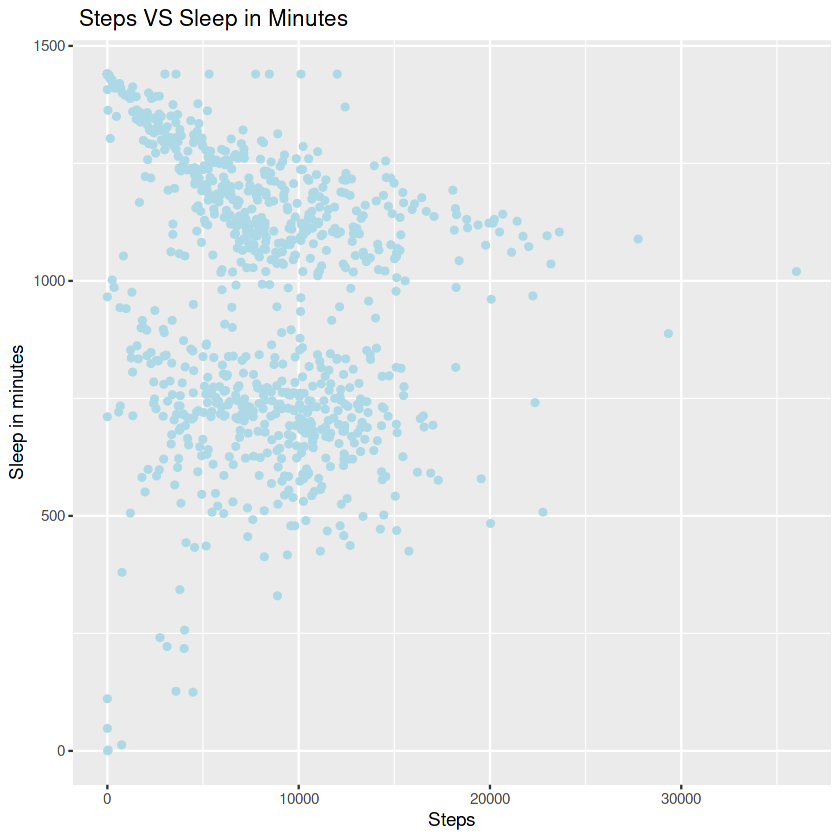

In [11]:
ggplot(daily_activity) + 
  geom_point(mapping = aes(x = total_steps, y = sedentary_minutes), color = "light blue") + 
  labs(x = "Steps", y = "Sleep in minutes", title = " Steps VS Sleep in Minutes")

##10. The above plot doesnt show any relationship between the sleeping trends and total steps. Joining the sleep and daily activity to analyze the other patterns

In [12]:
sleep_activity_joined <- left_join(sleep,daily_activity, by = c("id" = "id", "date" = "activity_date") )
str(sleep_activity_joined)

'data.frame':	410 obs. of  19 variables:
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                      : Date, format: "2016-04-12" "2016-04-13" ...
 $ time                      : chr  "12:00:00" "12:00:00" "12:00:00" "12:00:00" ...
 $ total_sleep_records       : int  1 2 1 2 1 1 1 1 1 1 ...
 $ total_minutes_asleep      : int  327 384 412 340 700 304 360 325 361 430 ...
 $ total_time_in_bed         : int  346 407 442 367 712 320 377 364 384 449 ...
 $ total_steps               : int  13162 10735 9762 12669 9705 15506 10544 9819 14371 10039 ...
 $ total_distance            : num  8.5 6.97 6.28 8.16 6.48 ...
 $ tracker_distance          : num  8.5 6.97 6.28 8.16 6.48 ...
 $ logged_activities_distance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num  1.88 1.57 2.14 2.71 3.19 ...
 $ moderately_active_distance: num  0.55 0.69 1.26 0.41 0.78 ...
 $ light_active_distance     : num  6.06 4.71 2.83 5.04 2.51 ...
 $ sedentary_active_

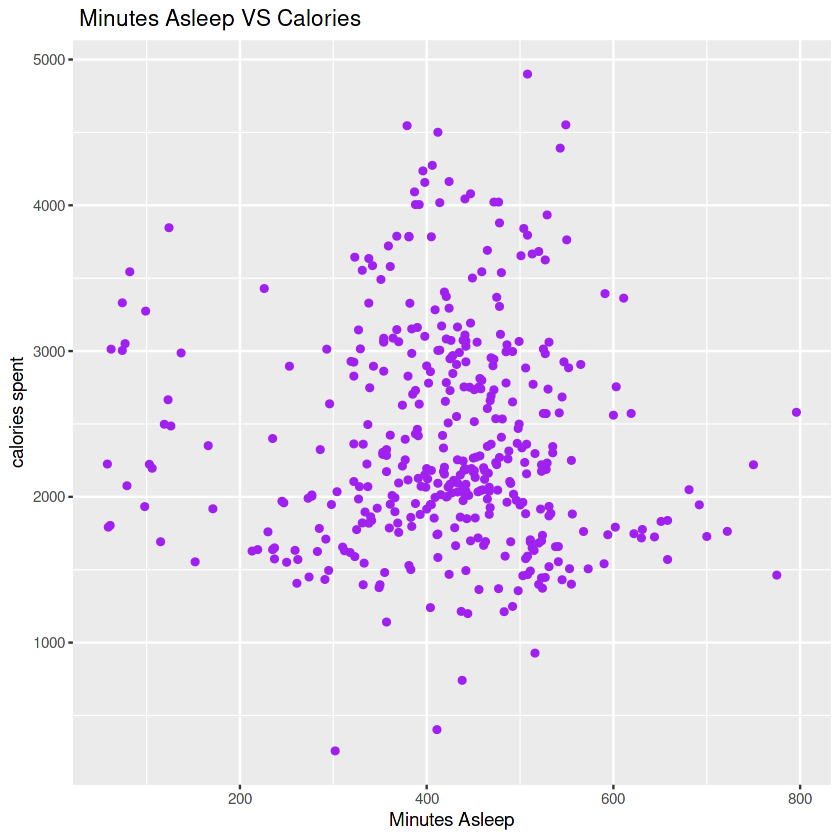

In [13]:
ggplot(sleep_activity_joined) + 
  geom_point(mapping = aes(x = total_minutes_asleep, y = calories), color = "purple") + 
  labs(x = "Minutes Asleep", y = "calories spent", title = " Minutes Asleep VS Calories")

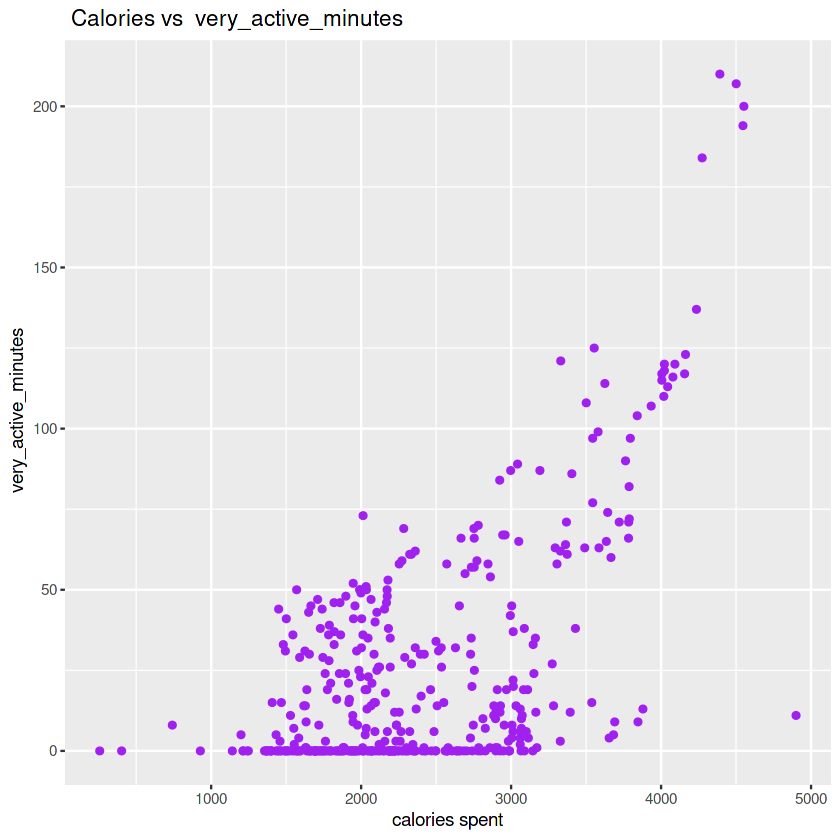

In [14]:
ggplot(sleep_activity_joined) + 
  geom_point(mapping = aes(x = calories, y = very_active_minutes ), color = "purple") + 
  labs(x = "calories spent", y = " very_active_minutes", title = " Calories vs  very_active_minutes")

This plot shows positive correlation between the calories and steps with very active sedentary minutes.

#Summary

    There is a positive correlation between the calories spent, total steps  & very active minutes. Bellabeat can incorporate this insights in their membership program by introducing activities and goals.